In [37]:
# Importation des différentes librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
# Lecture et affichage des données
data = pd.read_csv ('diabetes.csv')
data.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# Normalisation des données
std = StandardScaler()
standard_data = std.fit_transform(data.iloc[:, :-1])
data.iloc[:, :-1] = standard_data

In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [41]:
# On recupère les valeurs predites et celles à predire
x = data.drop ("Outcome", axis = 1)
y = data['Outcome']

In [42]:
# Séparation des données de test et d'apprentissage
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.80, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((615, 8), (153, 8), (615,), (153,))

In [43]:
# Création du model
model = LogisticRegression()
model.fit(x_train, y_train)

# Prédictions
y_pred = model.predict(x_test)
print(y_pred)

[1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0]


In [44]:
# Matrice de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", cf_matrix)

Confusion matrix
 [[91 13]
 [21 28]]


Text(0.5, 36.72222222222221, 'Predicted values')

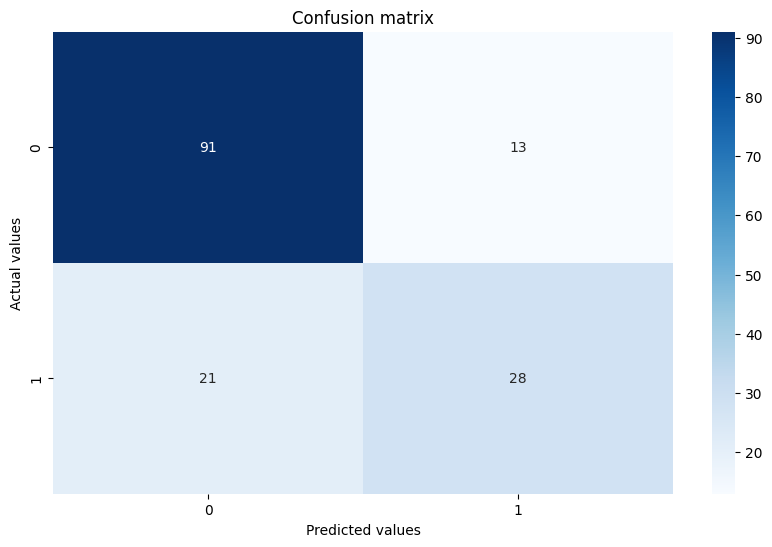

In [45]:
# Représentation graphique de la matrice de confusion
plt.figure (figsize = (10,6))
plt.title ("Confusion matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Blues', fmt = 'd')
plt.ylabel ("Actual values")
plt.xlabel ("Predicted values")

In [47]:
# Preciion du model
print("Precision du modèle :")
print(accuracy_score(y_test, y_pred)*100, '%')

Precision du modèle :
77.77777777777779 %


In [48]:
target_name = ['Will not PURCHASE', 'Will PURCHASE']
print("classification report : \n", classification_report(y_test, y_pred, target_names = target_name))

classification report : 
                    precision    recall  f1-score   support

Will not PURCHASE       0.81      0.88      0.84       104
    Will PURCHASE       0.68      0.57      0.62        49

         accuracy                           0.78       153
        macro avg       0.75      0.72      0.73       153
     weighted avg       0.77      0.78      0.77       153

